# This notebook contains data visualisation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
sns.set_style('darkgrid')

In [5]:
df=pd.read_excel('admission-pred-AnalysedData.xlsx')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,250.500000,316.498000,107.212000,3.112000,3.375000,3.487000,8.576120,0.562000,0.72174
std,144.481833,11.258753,6.070317,1.142833,0.990878,0.923057,0.604629,0.496638,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.97000


## Pie Chart for the University Ratings:

In [9]:
df0=(df['University Rating']==1)
stage=df[df0]
df1=(df['University Rating']==2)
stage1=df[df1]
df2=(df['University Rating']==3)
stage2=df[df2]
df3=(df['University Rating']==4)
stage3=df[df3]
df4=(df['University Rating']==5)
stage4=df[df4]

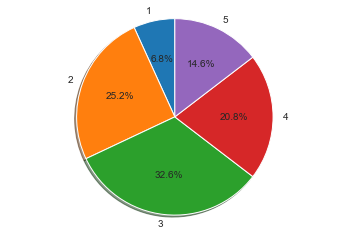

In [10]:
labels = '1','2','3','4','5'
sizes = [stage['University Rating'].count(),stage1['University Rating'].count(),stage2['University Rating'].count(),stage3['University Rating'].count(),stage4['University Rating'].count()]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

By the above Pie Chart, we get to know that the Universities rated 3 are more in number.

## Gaussian plot for CGPA, GRE Scores and TOEFL Scores based on University Ratings:

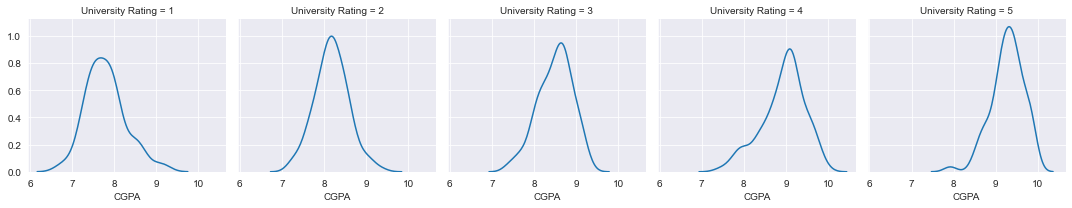

In [6]:
cgpa = sns.FacetGrid(df, col='University Rating')
cgpa = cgpa.map(sns.kdeplot, 'CGPA')

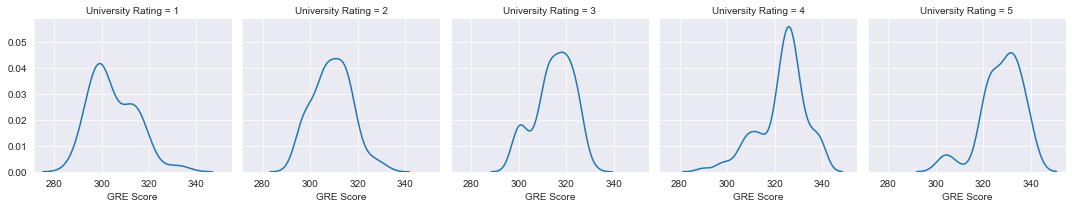

In [4]:
cgpa = sns.FacetGrid(df, col='University Rating')
cgpa = cgpa.map(sns.kdeplot, 'GRE Score')

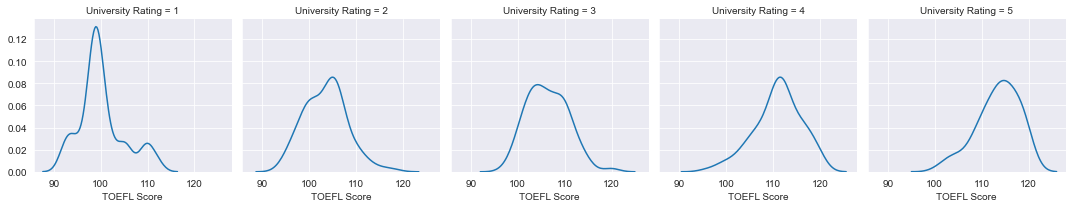

In [7]:
cgpa = sns.FacetGrid(df, col='University Rating')
cgpa = cgpa.map(sns.kdeplot, 'TOEFL Score')

## Let us check for the presence of outliers. If present, let's remove it:

In [11]:
from collections import Counter
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   
outliers_to_drop=detect_outliers(df,2,['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR', 'CGPA', 'Research'])


In [12]:
print(outliers_to_drop)

[]


In [13]:
df.loc[outliers_to_drop]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


#### We can see that an empty array is printed, this means that there are no outliers in this data set

## Histograms for GRE and TOEFL Scores:

#### Note: y-axis shows density

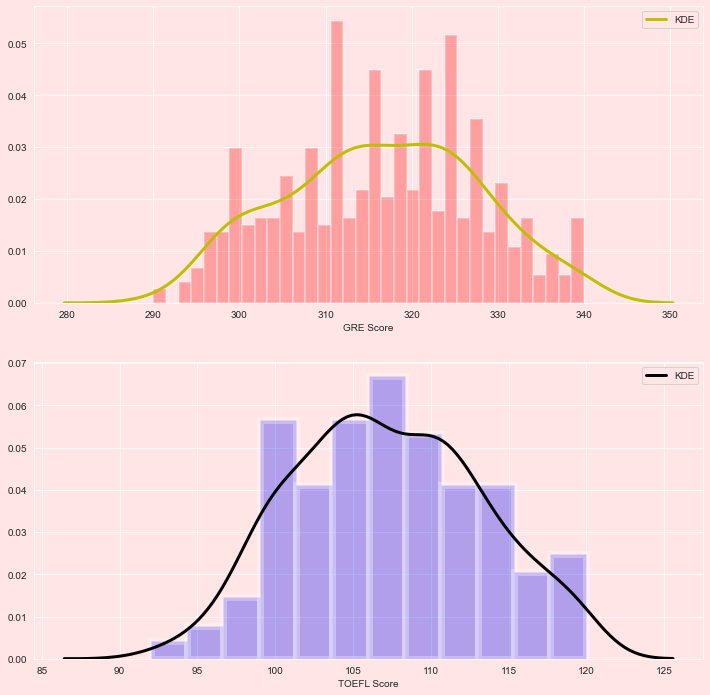

In [16]:
plt.rcParams['axes.facecolor'] = "#ffe5e5"
plt.rcParams['figure.facecolor'] = "#ffe5e5"
plt.figure(figsize=(12,12))
plt.subplot(2, 1, 1)
sns.distplot(df['GRE Score'],bins=34,color='Red',  kde_kws={"color": "y", "lw": 3, "label": "KDE"},hist_kws={"linewidth": 2,"alpha": 0.3 }, norm_hist=True)
plt.subplot(2, 1, 2)
sns.distplot(df['TOEFL Score'],bins=12,color='Blue' ,kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"linewidth": 7,"alpha": 0.3 }, norm_hist=True)

#### From the above two graphs, we an observe that people tend to score above 310 in GRE and above 100 in TOEFL

## Let us try to set cut-off scores and and try to analyse scores above the cut-off:

In [18]:
co_gre=df[df["GRE Score"]>=300]
co_toefl=df[df["TOEFL Score"]>=100]

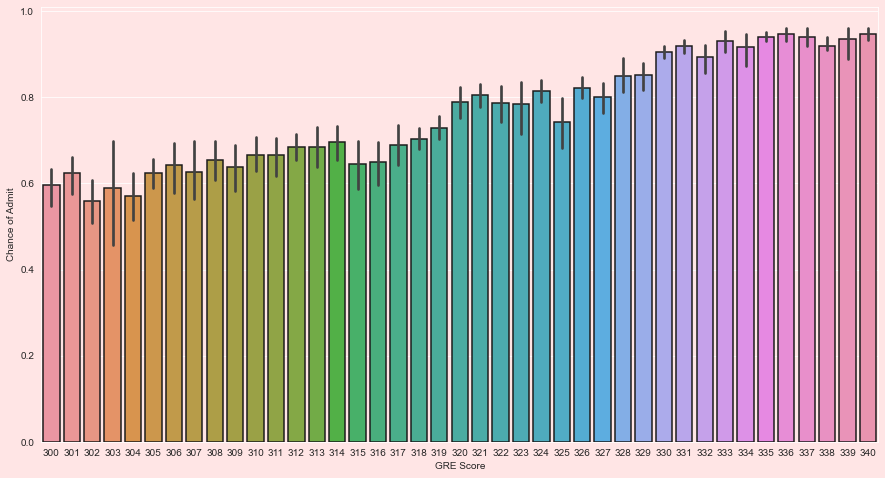

In [19]:
fig, ax = pyplot.subplots(figsize=(15,8))
sns.barplot(x='GRE Score',y='Chance of Admit',data=co_gre, linewidth=1.5,edgecolor="0.1")
plt.show()

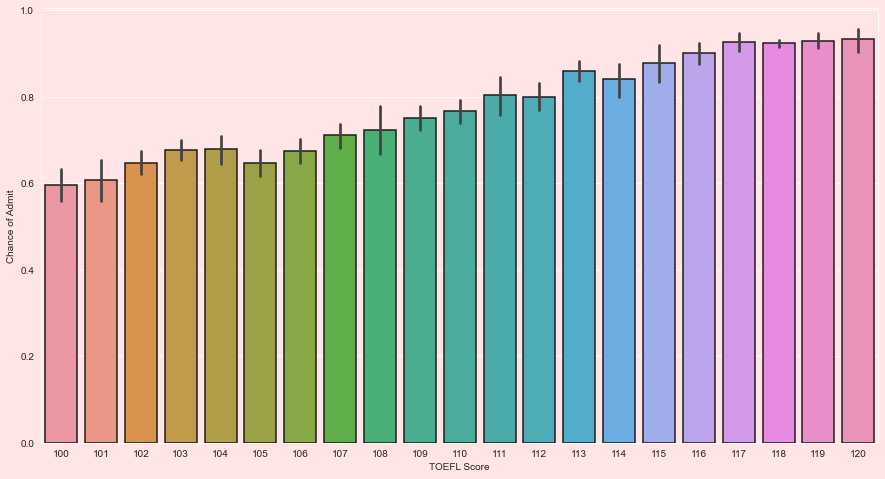

In [20]:
fig, ax = pyplot.subplots(figsize=(15,8))
sns.barplot(x='TOEFL Score',y='Chance of Admit',data=co_toefl, linewidth=1.5,edgecolor="0.1")
plt.show()

#### From the above plots, we get to know that there is higher chance of admission if GRE Score is greter than 300 and TOEFL Score is greater than 100

## Plots to find the toppers:

In [12]:
toppers=df[(df['GRE Score']>=330) & (df['TOEFL Score']>=115) & (df['CGPA']>=9.5)].sort_values(by=['Chance of Admit'],ascending=False)

#### The following are the histograms show the scores of toppers. The y-axis shows density

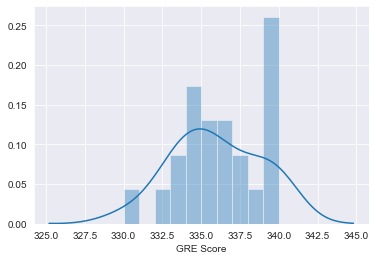

In [13]:
sns.distplot(toppers['GRE Score'], bins=10, kde=True, norm_hist=True)

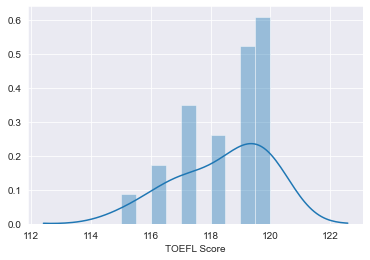

In [14]:
sns.distplot(toppers['TOEFL Score'], bins=10, kde=True, norm_hist=True)

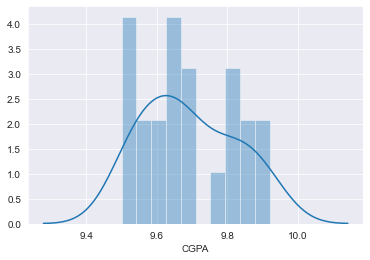

In [15]:
sns.distplot(toppers['CGPA'], bins=10, kde=True, norm_hist=True)